In [56]:
# Importing the libraries I will be using for my analysis.
import numpy as np 
import pandas as pd
import scipy
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [57]:
# Importing menu.csv as a data frame and checking it imported by checking the first 5 records using .head()
df = pd.read_csv('/kaggle/input/mcdonalds-menu-info/menu.csv')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [58]:
# Checking for null values
df.isna().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [59]:
# Displaying the unique values in Category to see what categories there are.
df.Category.unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

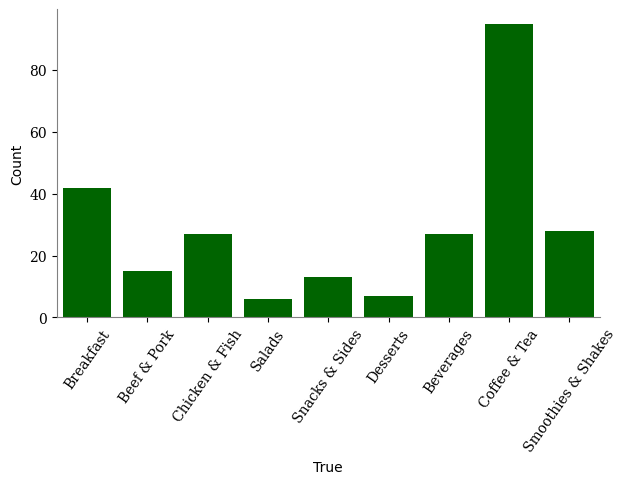

In [60]:
# Checking the count for each Category to see which categories are the most consumed by customers and visualize it using matplotlib and seaborn.
# Creating and styling bar chart
plt.style.use('default')
plt.figure(figsize=(7,4),edgecolor='0.1',dpi=100)
a = sns.countplot(x='Category',facecolor='darkgreen', data=df)

# Styling the X and Y ticks.
xticks = plt.xticks(rotation=55,family='serif')
yticks = plt.yticks(family='serif')

# X and Y labels
plt.xlabel(df['Category'].all())
plt.ylabel('Count')

# Creating and styling the axis lines
a.spines['bottom'].set_color('gray')
a.spines['left'].set_color('gray')
sns.despine()

# It appears that Tea and Coffee are the most consumed by customers.

In [61]:
# Checking which Category has the most number of unique items and visualizing using a density heatmap.
px.density_heatmap(x='Category',y='Item',data_frame=df,width=900)

# Coffee and Tea has the most unique items followed by Breakfast. (the longer the yellow bar, the more unique items.)

In [62]:
# Checking which Category has the highest amount of calories by displaying average calories distribution for each Category.
# Calculating the average of calories by each Category, grouping it by each Category, and converting it into a Pandas dataframe
calories = pd.DataFrame(df.groupby('Category')['Calories'].mean())

# Setting all of the colors to gray and creating the plot.
# The highest calorie average will be displayed in red (I did this using the index of the columns).
colors=['gray']*9
colors[3]='#AF0038'
fig = go.Figure(data=[go.Bar(
    x=calories.index,
    y=calories['Calories'],
    marker_color=colors
)])
fig.update_layout(width=700,height=500)
fig.update_yaxes(title='Average Calories')
fig.update_xaxes(title='Categories')
fig.show()

# I'll visualize this using Plotly.

In [63]:
# I want to do the same thing I did for Calories, for Total Fat. 
fat = pd.DataFrame(df.groupby('Category')['Total Fat'].mean())

colors=['gray']*9
colors[2]='#C4451C'
fig = go.Figure(data=[go.Bar(
    x=fat.index,
    y=fat['Total Fat'],
    marker_color=colors
)])
fig.update_yaxes(title='Average Total Fat')
fig.update_layout(width=700,height=500)
fig.show()

# You can see below that Breakfast has the most fat.

In [64]:
# The same calculation and visualization I did for Calories and Total Fat, I'm going to do for Carbohydrates
carbs = pd.DataFrame(df.groupby('Category')['Carbohydrates'].mean())

colors=['gray']*9
colors[7]='#B82E2E'
fig = go.Figure(data=[go.Bar(
    x=carbs.index,
    y=carbs['Carbohydrates'],
    marker_color=colors
)])
fig.update_yaxes(title='Average Carbohydrates')
fig.update_layout(width=700,height=500)
fig.show()

In [65]:
# I'm going to do the same thing for Sugars
sugars = pd.DataFrame(df.groupby('Category')['Sugars'].mean())

colors=['gray']*9
colors[7]='#B82E2E'
fig = go.Figure(data=[go.Bar(
    x=sugars.index,
    y=sugars['Sugars'],
    marker_color=colors
)])
fig.update_yaxes(title='Average Sugars')
fig.update_layout(width=700,height=500)
fig.show()

In [66]:
# I'm going to do the same thing for Protein
protein = pd.DataFrame(df.groupby('Category')['Protein'].mean())

colors=['gray']*9
colors[3]='#B82E2E'
fig = go.Figure(data=[go.Bar(
    x=protein.index,
    y=protein['Protein'],
    marker_color=colors
)])
fig.update_yaxes(title='Average Protein')
fig.update_layout(width=700,height=500)
fig.show()

In [67]:
# I'm going to do the same thing for Cholesterol
protein = pd.DataFrame(df.groupby('Category')['Cholesterol'].mean())

colors=['gray']*9
colors[2]='#B82E2E'
fig = go.Figure(data=[go.Bar(
    x=protein.index,
    y=protein['Cholesterol'],
    marker_color=colors
)])
fig.update_yaxes(title='Average Cholesterol')
fig.update_layout(width=700,height=500)
fig.show()

Text(0.5, 1.05, 'Carbs vs Sugars')

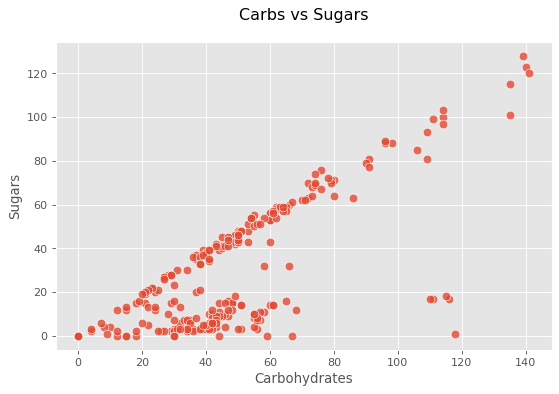

In [68]:
# Finding how Carbohydrates and Sugars are related using ggplot
plt.style.use('ggplot')
plt.figure(figsize=(8,5),dpi=80)
sns.scatterplot(x='Carbohydrates',y='Sugars',data=df,alpha=0.8,s=60)
plt.title('Carbs vs Sugars',x=0.5,y=1.05)

# It appears that the more carbs an item has, the more sugar it will have as well.

In [69]:
# Average nutrient analysis(% Daily Value) for each Category in percentage (daily recommended value)
cols = ['Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)',
        'Iron (% Daily Value)','Total Fat (% Daily Value)','Cholesterol (% Daily Value)',
        'Carbohydrates (% Daily Value)']

table = df.pivot_table(columns='Category',values=cols)
table.style.background_gradient(cmap='viridis')

# If a category is high in a specific nutrient, it will be yellow.

Category,Beef & Pork,Beverages,Breakfast,Chicken & Fish,Coffee & Tea,Desserts,Salads,Smoothies & Shakes,Snacks & Sides
Calcium (% Daily Value),23.000000,2.962963,16.166667,15.444444,28.294737,11.428571,15.000000,35.571429,6.000000
Carbohydrates (% Daily Value),13.466667,9.592593,16.571429,16.333333,14.863158,11.571429,7.166667,30.142857,9.615385
Cholesterol (% Daily Value),28.933333,0.185185,50.952381,25.222222,9.378947,4.857143,17.333333,14.714286,6.230769
Iron (% Daily Value),23.333333,0.296296,17.142857,16.370370,2.147368,4.000000,10.333333,3.964286,6.615385
Total Fat (% Daily Value),38.600000,0.148148,42.666667,41.333333,12.357895,11.142857,18.333333,21.714286,16.230769
Vitamin A (% Daily Value),6.933333,0.740741,6.928571,20.444444,10.736842,5.142857,146.666667,18.750000,4.846154
Vitamin C (% Daily Value),7.333333,23.481481,8.904762,12.629630,0.000000,4.142857,28.333333,6.964286,28.153846


In [70]:
# I'm creating a scatterplot which will plot the Cholesterol against the Total Fat. There are also a couple of box & whisker plots.
# The box & whisker plot on the right measures the Cholesterol of each Category, and the plot on the top measures the Total Fat of each item in each Category. 
fig = px.scatter(df, x='Total Fat (% Daily Value)',y='Cholesterol (% Daily Value)', color='Category',
                size='Calories',hover_name='Item',trendline='ols',
                template='plotly_dark',marginal_x='box',marginal_y='box')
fig.show()
# I used Calories as the size parameter. The larger the dot, the higher the calories.
# It looks like breakfast is the king of Total Fat and Cholesterol.

In [71]:
# I would like to make the same plot to compare Carbohydrates and Sugars
fig = px.scatter(df, x='Carbohydrates (% Daily Value)',y='Sugars', color='Category',
                size='Calories',hover_name='Item',trendline='ols',
                template='plotly_dark',marginal_x='box',marginal_y='box')
fig.show()

# It looks like smoothies and shakes have the highest sugars and carbs.

In [72]:
# I'm going to take each category and see the item with the highest amount of nutrients in the menu for each category
# Selecting the categories and their corresponding columns.

# You can see that the Big Breakfast with Hotcakes has the highest amount of Calories, Total Fat, Carbs, 
# Sodium, Protein, and Dietary Fiber in the Breakfast Category.'''
breakfast=df[df['Category']=='Breakfast']
beef_and_pork=df[df['Category']=='Beef & Pork']
chicken_and_fish=df[df['Category']=='Chicken & Fish']
salads=df[df['Category']=='Salads']
snacks_and_sides=df[df['Category']=='Snacks & Sides']
desserts=df[df['Category']=='Desserts']
beverages=df[df['Category']=='Beverages']
coffee_and_tea=df[df['Category']=='Coffee & Tea']
smoothies_and_shakes=df[df['Category']=='Smoothies & Shakes']
cols=['Calories','Total Fat','Carbohydrates','Sodium','Protein','Dietary Fiber']
for col in cols:
    print(col)
    a=breakfast.groupby('Item')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')
    print(col)
    a=beef_and_pork.groupby('Item')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')
    print(col)
    a=chicken_and_fish.groupby('Item')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')
    print(col)
    a=salads.groupby('Item')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')
    print(col)
    a=snacks_and_sides.groupby('Item')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')
    print(col)
    a=desserts.groupby('Item')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')
    print(col)
    a=beverages.groupby('Item')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')
    print(col)
    a=coffee_and_tea.groupby('Item')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')
    print(col)
    a=smoothies_and_shakes.groupby('Item')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')

Calories
Item
Big Breakfast with Hotcakes (Large Biscuit)    1150
Name: Calories, dtype: int64
----------------------------------------


Calories
Item
Double Quarter Pounder with Cheese    750
Name: Calories, dtype: int64
----------------------------------------


Calories
Item
Chicken McNuggets (40 piece)    1880
Name: Calories, dtype: int64
----------------------------------------


Calories
Item
Premium Southwest Salad with Crispy Chicken    450
Name: Calories, dtype: int64
----------------------------------------


Calories
Item
Large French Fries    510
Name: Calories, dtype: int64
----------------------------------------


Calories
Item
Hot Caramel Sundae    340
Name: Calories, dtype: int64
----------------------------------------


Calories
Item
Coca-Cola Classic (Large)    280
Name: Calories, dtype: int64
----------------------------------------


Calories
Item
Frappé Chocolate Chip (Large)    760
Name: Calories, dtype: int64
----------------------------------------


Calories